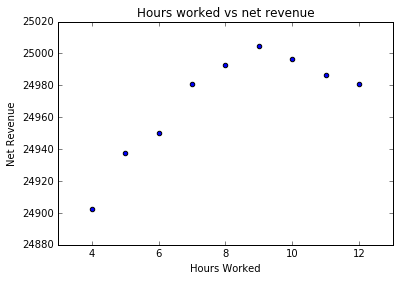

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a_true = -3
h_true = 9.25
k_true = 25000
sigma_true = 10

x = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12]) 
noise = np.random.normal(loc = 0, scale = sigma_true, size = x.shape[0])
y_observed = a_true * (x - h_true) ** 2 + k_true + noise

plt.scatter(x, y_observed)
plt.xlabel('Hours Worked')
plt.ylabel('Net Revenue')
plt.title('Hours worked vs net revenue')
plt.show()

In [2]:
from scipy.stats import norm
from itertools import product

# Come up with a hypothesis for each parameter
hypotheses_a = np.array([-4, -3, -2, -1])
hypotheses_h = np.arange(0, 16)
hypotheses_k = np.array([18000, 20000, 23000, 25000, 26000, 28000, 30000])
hypotheses_sigma = np.array([5, 10, 15, 20, 25])

# Create list of every possible combination of them.
hypotheses = list(product(hypotheses_a, hypotheses_h, hypotheses_k, hypotheses_sigma))

In [3]:
def normalize(log_p):
    shifted_p = np.exp( log_p - np.max(log_p) )
    normalized_log_p = shifted_p / np.sum(shifted_p)
    return normalized_log_p

In [6]:
likelihoods = np.ones(len(hypotheses))
for idx, hypothesis in enumerate(hypotheses):
    hypo_a, hypo_h, hypo_k, hypo_sigma = hypothesis
    y_pred = hypo_a * (x - hypo_h) ** 2 + hypo_k
    errors = y_observed - y_pred
    y_prob = norm.pdf(0, loc = errors, scale = hypo_sigma) + 1e-10
    likelihoods[idx] = np.sum( np.log(y_prob) )

normalized_likelikhoods = normalize(likelihoods)
best_param = hypotheses[ np.argmax(normalized_likelikhoods) ]
best_param

(-3, 9, 25000, 10)

pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

In [4]:
import pymc3 as pm

with pm.Model() as model:
    _a = pm.Uniform('a', lower = -10, upper = 0)
    _h = pm.Uniform('h', lower = 4, upper = 12)
    _k = pm.Uniform('k', lower = 18000, upper = 30000)
    _sigma = pm.Uniform('sigma', lower = 5, upper = 25)

    y_pred = _a * (x - _h) ** 2 + _k
    errors = y_observed - y_pred
    
    y_prob = pm.Normal('y_prob', mu = 0, sd = _sigma, observed = errors)
    
    start = pm.find_MAP() # Find starting value by optimization
    step  = pm.NUTS(scaling = start) # Instantiate MCMC sampling algorithm
    trace = pm.sample(25000, step = step, start = start, njobs = 1)

         Current function value: 34.479890
         Iterations: 30
         Function evaluations: 114
         Gradient evaluations: 102


100%|██████████| 25000/25000 [00:47<00:00, 527.47it/s]


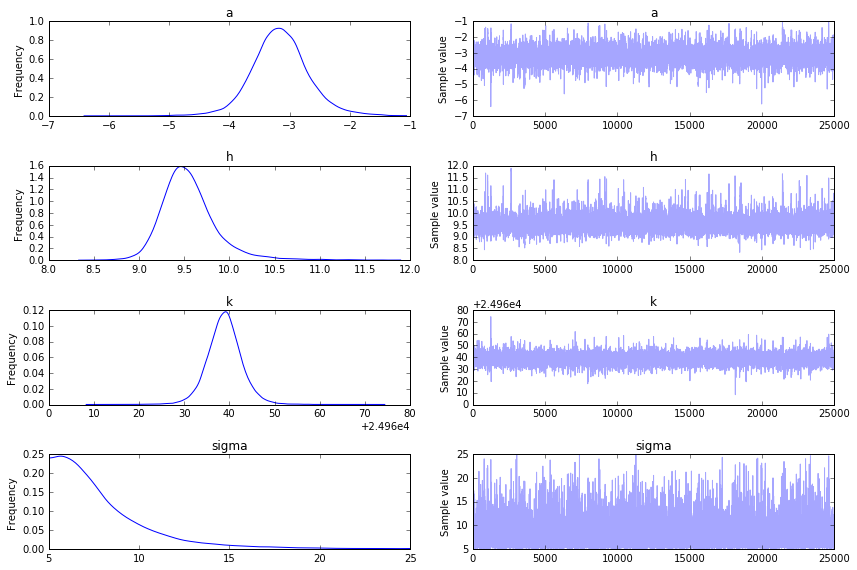

In [6]:
pm.traceplot(trace)
plt.show()

http://www.databozo.com/break-the-markov-chains-of-oppression-modeling-without-mcmc